# Import Libraries

In [102]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn.preprocessing import StandardScaler
import datasist as ds
sns.set(rc={'figure.figsize': [15,4]}, font_scale=1.5)

# Dataset

In [2]:
df = pd.read_csv('Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
#to see the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
#to see the last 5 rows
df.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [13]:
#to Return a tuple representing the dimensionality of the DataFrame
df.shape

(2000, 8)

In [7]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


- The  first note we can see we are not lucky, we have missing values in the (Profession) column and we will modify it in the cleaning phase

In [14]:
#Generate descriptive statistics.
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


# Data Cleaning

In [6]:
df1 = df.copy()

In [8]:
#check null values
df1.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [10]:
#handling and drop null values
df1.dropna(axis =0 , inplace=True)

In [11]:
#make sure data don't have null values
df1.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [9]:
#check the duplicated values
df1.duplicated().sum()

0

# Data Analysis and Visualisation

In [19]:
def clean_dataset(df1):
    df2 = df1[df1['Age'] < 80 ]
    df3 = df1[df1['Age']  > 20]
    return df2
df1 = clean_dataset(df1)

# Univariate

### Categorical 

In [26]:
def countp(col, title):
    ax = plt.title( title , fontsize = 16)
    ax = sns.countplot(data=df1 , x = col)
    for label in ax.containers:
        ax.bar_label(label)

>Q1: the most of the customers are female or male?

In [29]:
df1['Gender'].value_counts()

Female    939
Male      639
Name: Gender, dtype: int64

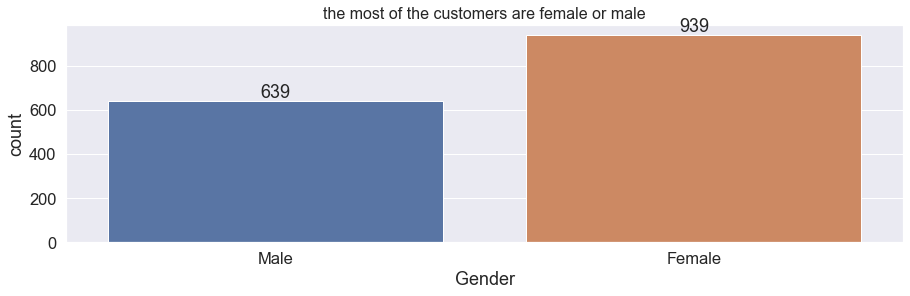

In [30]:
countp('Gender' ,'the most of the customers are female or male' )

>Q2:what is the most employed profession

In [27]:
df1['Profession'].value_counts()

Artist           485
Healthcare       286
Entertainment    177
Doctor           136
Engineer         132
Executive        127
Lawyer           116
Marketing         68
Homemaker         51
Name: Profession, dtype: int64

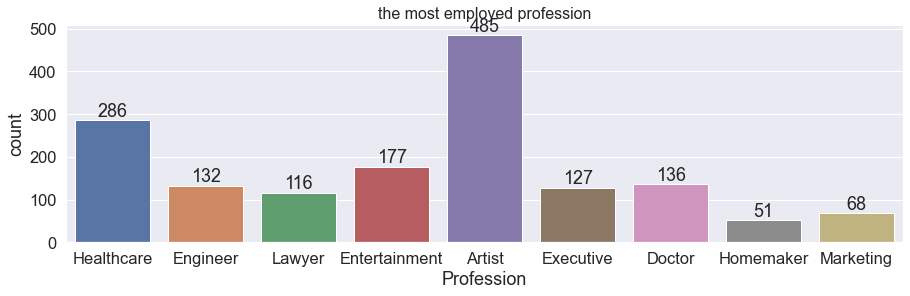

In [28]:
countp('Profession' ,'the most employed profession' )

### Numerical

In [31]:
def histo(col, title):
    ax = plt.title( title , fontsize = 16)
    ax = sns.histplot(data=df1 , x = col)
    for label in ax.containers:
        ax.bar_label(label)

>Q3:what is the average of spending score

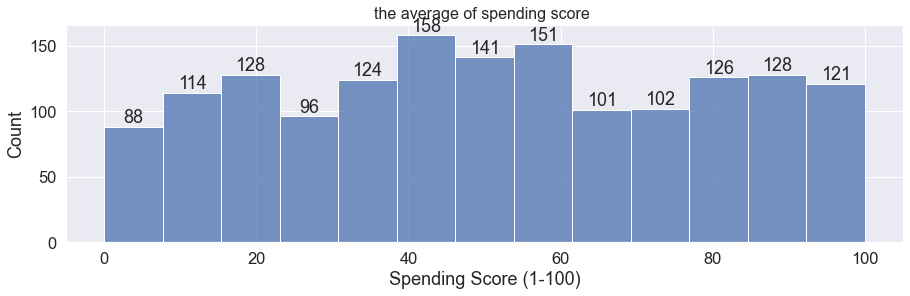

In [32]:
histo('Spending Score (1-100)' , 'the average of spending score ')

>Q4:what is the average age of the customers?

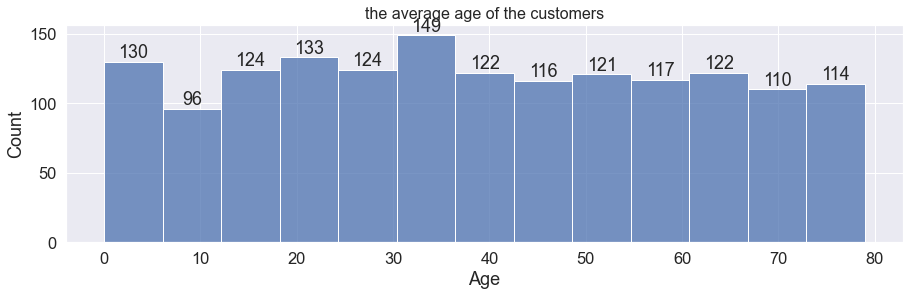

In [35]:
histo('Age' , 'the average age of the customers')

>Q5:what is the average of Annual Income?

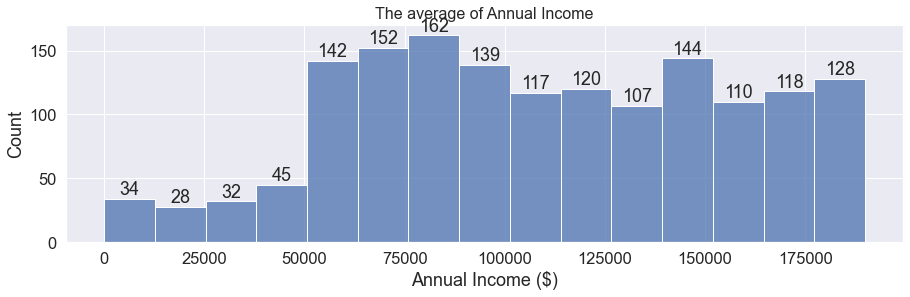

In [36]:
histo('Annual Income ($)' , 'The average of Annual Income')

# Bivariate

### Categorical 

In [92]:
def cat_g (dat ,col , title):
    fig = px.bar(data_frame=dat , x = 'Gender', y = col , text_auto='0.3s')
    fig.update_traces(textfont_size = 12 , textposition = 'outside')
    fig.update_layout(title_text=title, title_x=0.4)
    fig.show()

>Q6:what is the Average income for each of female and men?

In [93]:
df1.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [94]:
gender_Annual  = df1.groupby('Gender')['Annual Income ($)'].count().reset_index()
gender_Annual

,Gender,Annual Income ($)
0,Female,939
1,Male,639


In [95]:
cat_g(gender_Annual,'Annual Income ($)' ,'the best income for gender')

>Q7 what is the average of age each of the customers female and male

In [96]:
gender_Age  = df1.groupby('Gender')['Age'].mean().reset_index()
gender_Age

,Gender,Age
0,Female,39.136315
1,Male,38.801252


In [97]:
cat_g(gender_Age,'Age' ,' the average of age each of the customers female and male')

> Q8 what is the average of spending score for each of female and male


In [98]:
gender_spend  = df1.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()
gender_spend

,Gender,Spending Score (1-100)
0,Female,50.323749
1,Male,52.276995


In [99]:
cat_g(gender_spend,'Spending Score (1-100)' ,' the average of Spending Score (1-100) each of the customers female and male')

> Q9 check the work experience for each of female and male

In [100]:
gender_work  = df1.groupby('Gender')['Work Experience'].mean ().reset_index()
gender_work

,Gender,Work Experience
0,Female,4.038339
1,Male,4.247261


In [101]:
cat_g(gender_work,'Work Experience' ,' the average of Work Experience each of the customers female and male')

> Q10 Which of the professions has the highest annual income?

In [91]:
fig = px.pie(data_frame=df1 , names =df1.groupby('Profession')['Annual Income ($)'].count().index
       , values = df1.groupby('Profession')['Annual Income ($)'].count().values)
fig.update_layout(title_text='the professions has the highest annual income', title_x=0.2)
fig.show()

> Q11 Does age affect career in medicine?

In [161]:
df2= df1[(df1['Profession'] == 'Doctor') & (df1['Age'] <60)] 
df3= df1[(df1['Profession'] == 'Doctor') & (df1['Age'] >60)]
df2.describe().compare(df3.describe())

CustomerID                      Age            Annual Income ($)  \
              self        other        self      other              self   
count   104.000000    30.000000  104.000000  30.000000        104.000000   
mean    955.826923  1196.366667   29.230769  70.266667     106511.548077   
std     591.761456   594.374228   18.782470   5.489384      48203.788729   
min      15.000000    58.000000    0.000000  61.000000          0.000000   
25%     391.500000   673.500000   12.000000  65.000000      69307.500000   
50%    1011.500000  1347.000000   30.500000  71.000000     105618.500000   
75%    1407.000000  1703.500000   47.000000  75.000000     148836.000000   
max    1990.000000  1959.000000   59.000000  79.000000     189672.000000   

                    Spending Score (1-100)            Work Experience  \
              other                   self      other            self   
count      30.00000             104.000000  30.000000      104.000000   
mean   120857.10000              54.846154  47.733333        4.528846   
std     54191.75869              28.319868  25.138147        4.756103   
min      8000.00000               1.000000   4.000000             NaN   
25%     75140.50000              31.500000  34.750000             NaN   
50%    126512.00000              57.000000  45.000000        2.000000   
75%    171948.50000              78.250000  60.000000        8.000000   
max    187141.00000             100.000000  97.000000       16.000000   

                 Family Size             
           other        self      other  
count  30.000000  104.000000  30.000000  
mean    4.300000    3.644231   3.633333  
std     3.505169    2.135771   1.902509  
min          NaN         NaN        NaN  
25%          NaN         NaN        NaN  
50%     5.000000    3.000000   3.500000  
75%     7.000000    6.000000   5.000000  
max    10.000000         NaN        NaN

>12 What is the avg work experience for female in the engineering field?

# Multivariate

In [136]:
z = df1.groupby(['Profession' ,'Gender'])['Work Experience'].mean().reset_index()
z

,Profession,Gender,Work Experience
0,Artist,Female,4.133550
1,Artist,Male,4.235955
2,Doctor,Female,4.178082
3,Doctor,Male,4.698413
4,Engineer,Female,3.920000
5,Engineer,Male,3.894737
6,Entertainment,Female,3.576923
7,Entertainment,Male,3.808219
8,Executive,Female,4.238806
9,Executive,Male,4.300000


In [137]:
px.bar(data_frame=z , x= 'Gender', y='Work Experience' , color = 'Profession')

>Q13 What is the average annual income for each of male and female in each profession ?

In [138]:
i = df1.groupby(['Profession' ,'Gender'])['Annual Income ($)'].mean().reset_index()
i

,Profession,Gender,Annual Income ($)
0,Artist,Female,106109.094463
1,Artist,Male,108916.640449
2,Doctor,Female,106873.986301
3,Doctor,Male,113645.095238
4,Engineer,Female,102847.826667
5,Engineer,Male,114324.052632
6,Entertainment,Female,108306.394231
7,Entertainment,Male,112192.986301
8,Executive,Female,114182.940299
9,Executive,Male,106437.133333


In [139]:
px.bar(data_frame=i , x= 'Gender', y='Annual Income ($)' , color = 'Profession')

> Q14 What is the average spending score for each of male and female in each profession ?


In [140]:
s = df1.groupby(['Profession' ,'Gender'])['Spending Score (1-100)'].mean().reset_index()
s

,Profession,Gender,Spending Score (1-100)
0,Artist,Female,51.804560
1,Artist,Male,56.101124
2,Doctor,Female,52.205479
3,Doctor,Male,53.936508
4,Engineer,Female,52.213333
5,Engineer,Male,47.333333
6,Entertainment,Female,50.519231
7,Entertainment,Male,56.082192
8,Executive,Female,52.567164
9,Executive,Male,42.666667


In [143]:
fig = px.sunburst(data_frame=s , names= 'Profession' , path=['Profession', 'Gender'] , values= 'Spending Score (1-100)')
fig.update_layout(title_text=' the average spending score for each of male and female in each profession ', title_x=0.2)
fig.show()

C:\Users\3510\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\3510\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



>Q 15 What is the average of age for each of male and female in each profession ?


In [149]:
a = df1.groupby(['Profession' ,'Gender'])['Age'].mean().reset_index()
a

,Profession,Gender,Age
0,Artist,Female,39.791531
1,Artist,Male,36.308989
2,Doctor,Female,37.630137
3,Doctor,Male,40.015873
4,Engineer,Female,42.080000
5,Engineer,Male,43.157895
6,Entertainment,Female,38.576923
7,Entertainment,Male,39.657534
8,Executive,Female,37.567164
9,Executive,Male,38.216667


In [150]:
fig = px.sunburst(data_frame=a , names= 'Profession' , path=['Profession', 'Gender'] , values= 'Age')
fig.update_layout(title_text=' the average spending score for each of male and female in each profession ', title_x=0.2)
fig.show()

C:\Users\3510\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\3510\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# PreProcessing

# Check Outliers

In [162]:
from datasist.structdata import detect_outliers

In [165]:
idx =detect_outliers (df1 , 0 , ['Age','Annual Income ($)','Spending Score (1-100)','Work Experience'])
idx

[]

- this is dataset don't have outliers

# Convert to csv 

In [167]:
df1.to_csv('Clean_Customer.csv', index= False)

## <center>Thank You ❤ </center>
